In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!git clone https://github.com/NVlabs/stylegan3.git
%cd stylegan3


Cloning into 'stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 212 (delta 99), reused 90 (delta 90), pack-reused 49 (from 1)
Receiving objects: 100% (212/212), 4.16 MiB | 17.90 MiB/s, done.
Resolving deltas: 100% (108/108), done.
/content/stylegan3


In [ ]:
!pip install ninja imageio-ffmpeg==0.4.3
!pip install click requests tqdm pyspng
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 32.1 MB/s eta 0:00:00
  Attempting uninstall: imageio-ffmpeg
    Found existing installation: imageio-ffmpeg 0.6.0
    Uninstalling imageio-ffmpeg-0.6.0:
      Successfully uninstalled imageio-ffmpeg-0.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.1/196.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
!python /content/stylegan3/dataset_tool.py \
  --source="/content/drive/MyDrive/EECE 490 Project/All_DR_Images_Processed_Balanced" \
  --dest="/content/drive/MyDrive/EECE 490 Project/all_dr_dataset.zip" \
  --resolution=512x512


KeyboardInterrupt: 

In [ ]:
!cp "/content/drive/MyDrive/EECE 490 Project/all_dr_dataset.zip" /content/stylegan3/


In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())


CUDA Available: True


In [ ]:
train_path = "/content/stylegan3/train.py"

# Read the content of the file
with open(train_path, "r") as f:
    code = f.read()

# Fix betas format if found
code = code.replace(
    "betas=[0,0.99]",  # in case the list version is there
    "betas=(float(0.0), float(0.99))"
).replace(
    "betas=[0, 0.99]",  # other spacing variant
    "betas=(float(0.0), float(0.99))"
)

# Save the modified code back
with open(train_path, "w") as f:
    f.write(code)

print("✅ Patched `train.py` successfully — betas are now tuples!")


✅ Patched `train.py` successfully — betas are now tuples!


In [ ]:
!grep "betas=" /content/stylegan3/train.py


    c.G_opt_kwargs = dnnlib.EasyDict(class_name='torch.optim.Adam', betas=(float(0.0), float(0.99)), eps=1e-8)
    c.D_opt_kwargs = dnnlib.EasyDict(class_name='torch.optim.Adam', betas=(float(0.0), float(0.99)), eps=1e-8)


In [ ]:
!python train.py \
  --outdir="/content/drive/MyDrive/EECE 490 Project/Training_Runs(DR)" \
  --cfg=stylegan3-t \
  --data=/content/stylegan3/all_dr_dataset.zip \
  --gpus=1 \
  --batch=32 \
  --gamma=8.2 \
  --glr=0.0025 \
  --dlr=0.002 \
  --cbase=32768 \
  --cmax=512 \
  --map-depth=2 \
  --mbstd-group=4 \
  --aug=ada \
  --target=0.6 \
  --kimg=5000 \
  --snap=10 \
  --metrics=fid50k_full



Training options:
{
  "G_kwargs": {
    "class_name": "training.networks_stylegan3.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "channel_base": 32768,
    "channel_max": 512,
    "magnitude_ema_beta": 0.9988915792636801
  },
  "D_kwargs": {
    "class_name": "training.networks_stylegan2.Discriminator",
    "block_kwargs": {
      "freeze_layers": 0
    },
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 32768,
    "channel_max": 512
  },
  "G_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0.0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.0025
  },
  "D_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0.0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.002
  },
  "loss_kwargs": {
    "class_name": "training.loss.StyleGAN2Loss",
    "r1_gamma": 8.2
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "prefetch_

In [ ]:
%cd stylegan3

/content/stylegan3


In [ ]:
!python gen_images.py \
  --outdir="/content/drive/MyDrive/EECE 490 Project/Generated_Images_DR" \
  --trunc=1.0 \
  --seeds=1000-1029 \
  --network="/content/drive/MyDrive/EECE 490 Project/Training_Runs(DR)/00000-stylegan3-t-all_dr_dataset-gpus1-batch32-gamma8.2/network-snapshot-000720.pkl"


Loading networks from "/content/drive/MyDrive/EECE 490 Project/Training_Runs(DR)/00000-stylegan3-t-all_dr_dataset-gpus1-batch32-gamma8.2/network-snapshot-000720.pkl"...
Generating image for seed 1000 (0/30) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 1001 (1/30) ...
Generating image for seed 1002 (2/30) ...
Generating image for seed 1003 (3/30) ...
Generating imag

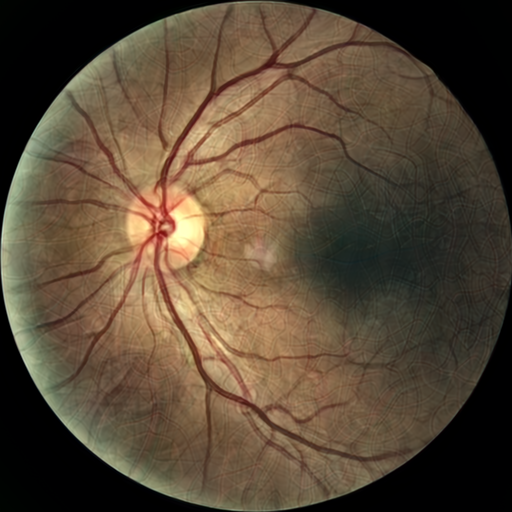

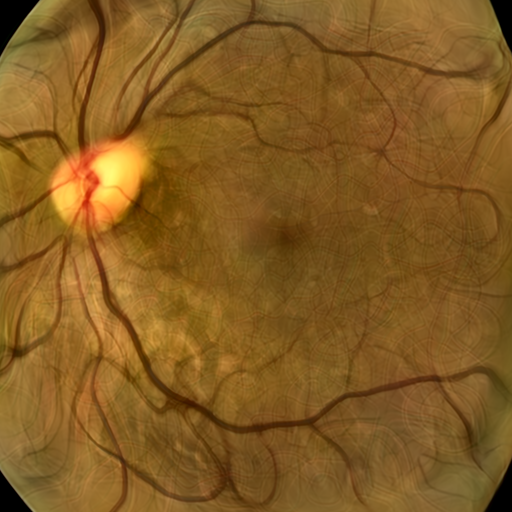

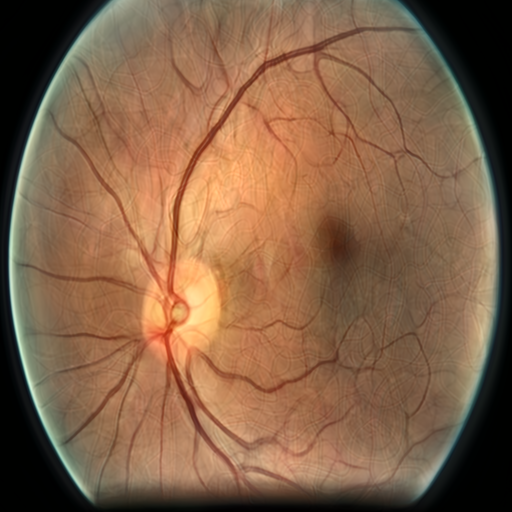

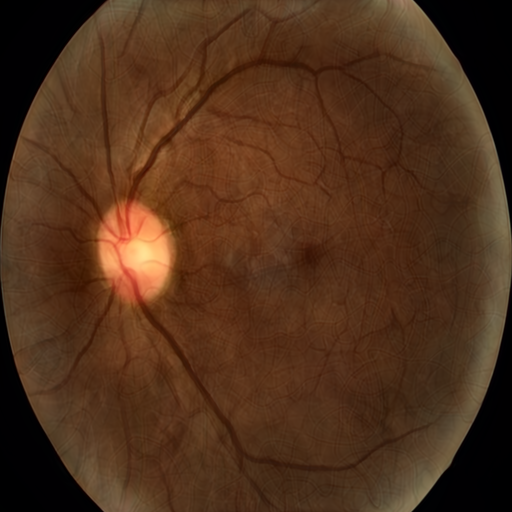

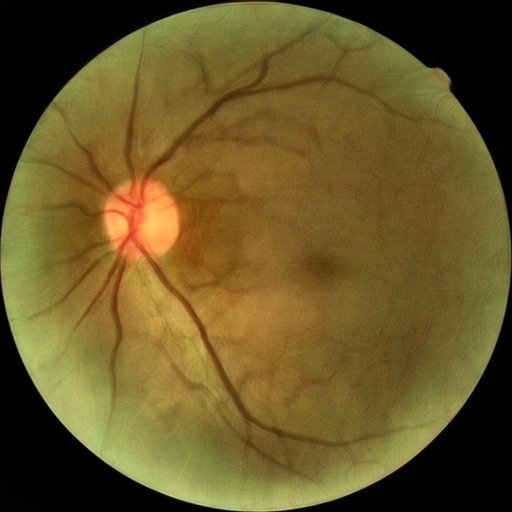

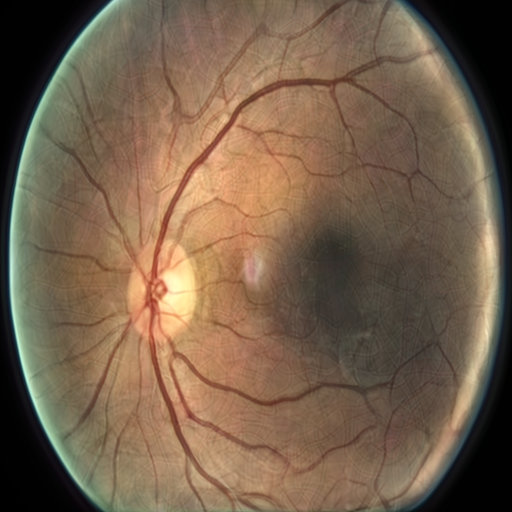

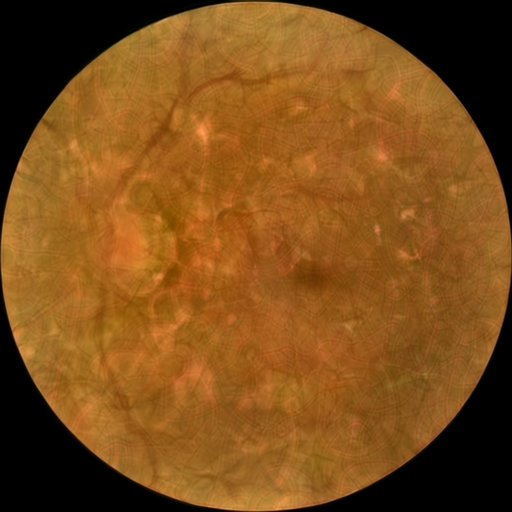

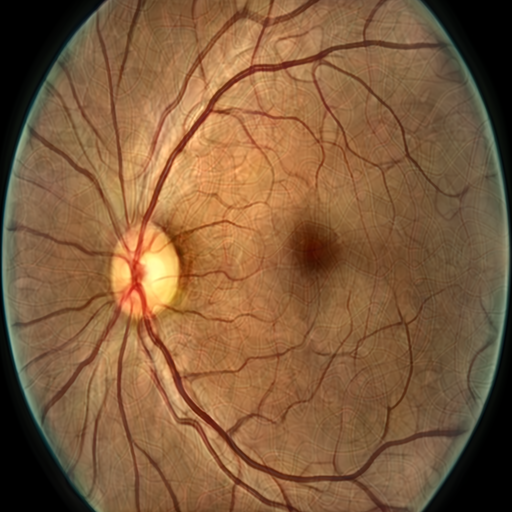

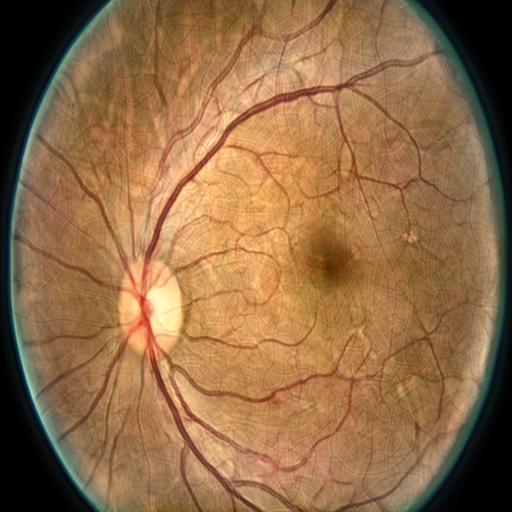

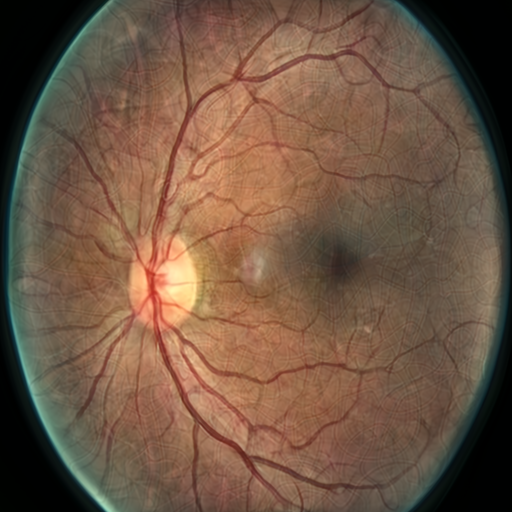

In [ ]:
import os
from IPython.display import Image, display

folder = "/content/generated_samples"
images = sorted(os.listdir(folder))[:10]  # show first 10

for img_name in images:
    display(Image(filename=os.path.join(folder, img_name)))
